In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install WordCloud

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [3]:
df = pd.read_csv('ws.csv')
df.columns = df.columns.str.replace(r"[^a-zA-Z\d\_]+", "")    
df.columns = df.columns.str.replace(r"[^a-zA-Z\d\_]+", "")
df.columns = df.columns.str.strip()     
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace(', ', ',')  

df

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,ProjectName,Description,IndustryDomain,PlatformsTools,DataPrivatePublic,ModelingTechniques,TimeSpenthours,WorkSchoolPersonal,Comments
0,Market Entry Strategy for Edible Oils into the...,Market study on the demand potential for edibl...,"Finance, Consulting","Excel, Powerpoint, Word",Private,Data Visualisation,500,Work,NaN
1,Jilin Province (China) Sanitory and Phytosanit...,Project was a collaboration between the Singap...,"Finance, Consulting","Excel, Powerpoint, Word",Private,Data Visualisation,1000,Work,NaN
2,Long Term Agricultural Commodity Price Project...,Study on the macroeconomic factors driving agr...,"Finance, Markets","Excel, Powerpoint, Word",Private,Linear Regression,1000,Work,NaN
3,Commodity Producer Trading Book,Live dashboard providing a snapshot of the com...,"Commodity, Trading, Data Analytics","Excel, Bloomberg",Private,Data Visualisation,500,Work,NaN
4,Commodity Inter-product Spread Relationship Mo...,Modelling of price relationship between substi...,"Commodity, Trading","Excel, Bloomberg",Private,Linear Regression,300,Work,NaN
5,Commodity Production Derivatives Hedging Model,Modelling the marginal economic impact of opti...,"Commodity, Trading",Excel,Private,"Scenario Analysis, Sensitivity Analysis, Black...",100,Work,NaN
6,EU-Indonesia Biodiesel Anti-Dumping Case Defense,Case involved proving that the company's econo...,"Commodity, Accounting",Excel,Private,Financial Analysis,500,Work,NaN
7,Introductory R Teaching Material,Created an introductory lesson for a Master's ...,Data Analytics,R,Public,NaN,50,Work,NaN
8,Logistics and Freight Pricing Strategy for Can...,Client was a Vancouver based e-commerce snack ...,Data Analytics,"Excel, Tableau",Public,Data Visualisation,400,Work,NaN
9,Applied Econometrics Course,Master's level introductory course to economet...,Statistical Analysis,"Excel, Stata, Tableau",Private,"Simple, Multivariate, Dummy Variable, Logistic...",100,School,NaN


In [4]:
df['IndustryDomain'] = df['IndustryDomain'].str.split(',')
df['PlatformsTools'] = df['PlatformsTools'].str.split(',')
df['ModelingTechniques'] = df['ModelingTechniques'].str.split(',')
df

,ProjectName,Description,IndustryDomain,PlatformsTools,DataPrivatePublic,ModelingTechniques,TimeSpenthours,WorkSchoolPersonal,Comments
0,Market Entry Strategy for Edible Oils into the...,Market study on the demand potential for edibl...,"[Finance, Consulting]","[Excel, Powerpoint, Word]",Private,[Data Visualisation],500,Work,NaN
1,Jilin Province (China) Sanitory and Phytosanit...,Project was a collaboration between the Singap...,"[Finance, Consulting]","[Excel, Powerpoint, Word]",Private,[Data Visualisation],1000,Work,NaN
2,Long Term Agricultural Commodity Price Project...,Study on the macroeconomic factors driving agr...,"[Finance, Markets]","[Excel, Powerpoint, Word]",Private,[Linear Regression],1000,Work,NaN
3,Commodity Producer Trading Book,Live dashboard providing a snapshot of the com...,"[Commodity, Trading, Data Analytics]","[Excel, Bloomberg]",Private,[Data Visualisation],500,Work,NaN
4,Commodity Inter-product Spread Relationship Mo...,Modelling of price relationship between substi...,"[Commodity, Trading]","[Excel, Bloomberg]",Private,[Linear Regression],300,Work,NaN
5,Commodity Production Derivatives Hedging Model,Modelling the marginal economic impact of opti...,"[Commodity, Trading]",[Excel],Private,"[Scenario Analysis, Sensitivity Analysis, Bl...",100,Work,NaN
6,EU-Indonesia Biodiesel Anti-Dumping Case Defense,Case involved proving that the company's econo...,"[Commodity, Accounting]",[Excel],Private,[Financial Analysis],500,Work,NaN
7,Introductory R Teaching Material,Created an introductory lesson for a Master's ...,[Data Analytics],[R],Public,NaN,50,Work,NaN
8,Logistics and Freight Pricing Strategy for Can...,Client was a Vancouver based e-commerce snack ...,[Data Analytics],"[Excel, Tableau]",Public,[Data Visualisation],400,Work,NaN
9,Applied Econometrics Course,Master's level introductory course to economet...,[Statistical Analysis],"[Excel, Stata, Tableau]",Private,"[Simple, Multivariate, Dummy Variable, Logi...",100,School,NaN


In [5]:
df2 = df.explode('PlatformsTools')
df3 = df2.explode('IndustryDomain')
df4 = df3.explode('ModelingTechniques')

df4

,ProjectName,Description,IndustryDomain,PlatformsTools,DataPrivatePublic,ModelingTechniques,TimeSpenthours,WorkSchoolPersonal,Comments
0,Market Entry Strategy for Edible Oils into the...,Market study on the demand potential for edibl...,Finance,Excel,Private,Data Visualisation,500,Work,NaN
0,Market Entry Strategy for Edible Oils into the...,Market study on the demand potential for edibl...,Consulting,Excel,Private,Data Visualisation,500,Work,NaN
0,Market Entry Strategy for Edible Oils into the...,Market study on the demand potential for edibl...,Finance,Powerpoint,Private,Data Visualisation,500,Work,NaN
0,Market Entry Strategy for Edible Oils into the...,Market study on the demand potential for edibl...,Consulting,Powerpoint,Private,Data Visualisation,500,Work,NaN
0,Market Entry Strategy for Edible Oils into the...,Market study on the demand potential for edibl...,Finance,Word,Private,Data Visualisation,500,Work,NaN
...,...,...,...,...,...,...,...,...,...
16,COVID Time-Series Projection Model and Online ...,Client was a hospital in Vancouver that would ...,Data Analytics,R,Public,ARIMA,500,Work,NaN
16,COVID Time-Series Projection Model and Online ...,Client was a hospital in Vancouver that would ...,Data Analytics,R,Public,ARIMAX,500,Work,NaN
16,COVID Time-Series Projection Model and Online ...,Client was a hospital in Vancouver that would ...,Apps,R,Public,Exponential Smoothing,500,Work,NaN
16,COVID Time-Series Projection Model and Online ...,Client was a hospital in Vancouver that would ...,Apps,R,Public,ARIMA,500,Work,NaN


In [6]:
df4 = df4.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df4 = df4.applymap(lambda x: x.replace('_', '') if isinstance(x, str) else x)
df4.to_csv('ws_output.csv')

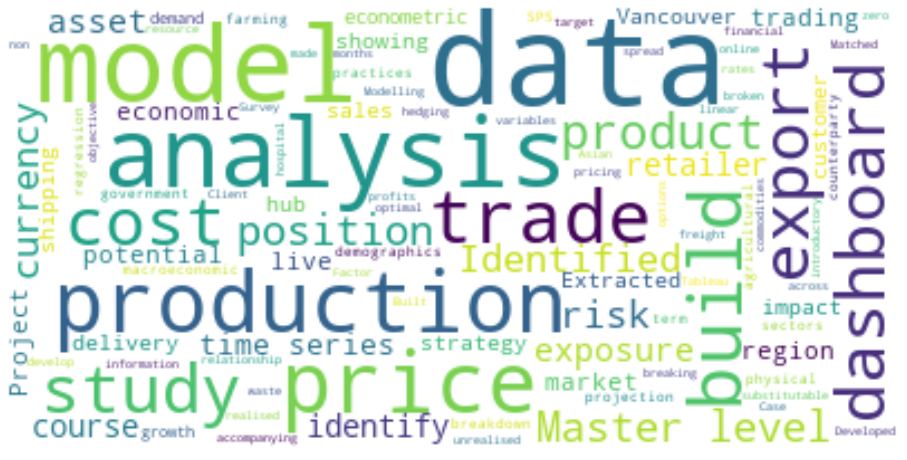

In [7]:
stopwords = set(STOPWORDS)
stopwords.update(["company","created","worked","used","etc","item","conducted","n","using"])

text = df['Description'].values
wordcloud = WordCloud(max_font_size=56,
                      max_words=100,
                      stopwords=stopwords,
                      background_color="white").generate(str(text))
plt.figure(figsize=[16,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("ws_wc.png", format="png")
plt.show()